<a href="https://colab.research.google.com/github/Graviton12/MLA_SZM/blob/main/MLA5_SZM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment #5
### Samia Mahmood
### CS 430
### Machine Learning in the Cloud

# Problem 1
## 1) Imports for specific models
#### Include imports for Voting, Bagging, Random Forest and AdaBoost classifiers
#### Include imports for classification_report and ConfusionMatrixDisplay

### Standard Imports

In [ ]:
# general importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Imports for Specific Models

In [ ]:
# importing for specific models
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import sklearn.model_selection as model_selection

### Imports for Splitting Data and Building Pipeline


In [ ]:
# importing for splitting data and for building pipeline
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

### Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## 2) Random Forest Classifier - Acquire Data
Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.

In [ ]:
# loading the data for train
landsat_train = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/landsat_train.csv')
# loading the data for test
landsat_test = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/landsat_test.csv')

In [ ]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
landsat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   top_left_r            4435 non-null   int64
 1   top_left_g            4435 non-null   int64
 2   top_left_infra1       4435 non-null   int64
 3   top_left_infra2       4435 non-null   int64
 4   top_middle_r          4435 non-null   int64
 5   top_middle_g          4435 non-null   int64
 6   top_middle_infra1     4435 non-null   int64
 7   top_middle_infra2     4435 non-null   int64
 8   top_right_r           4435 non-null   int64
 9   top_right_g           4435 non-null   int64
 10  top_right_infra1      4435 non-null   int64
 11  top_right_infra2      4435 non-null   int64
 12  middle_left_r         4435 non-null   int64
 13  middle_left_g         4435 non-null   int64
 14  middle_left_infra1    4435 non-null   int64
 15  middle_left_infra2    4435 non-null   int64
 16  centra

In [ ]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [ ]:
landsat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   top_left_r            2000 non-null   int64
 1   top_left_g            2000 non-null   int64
 2   top_left_infra1       2000 non-null   int64
 3   top_left_infra2       2000 non-null   int64
 4   top_middle_r          2000 non-null   int64
 5   top_middle_g          2000 non-null   int64
 6   top_middle_infra1     2000 non-null   int64
 7   top_middle_infra2     2000 non-null   int64
 8   top_right_r           2000 non-null   int64
 9   top_right_g           2000 non-null   int64
 10  top_right_infra1      2000 non-null   int64
 11  top_right_infra2      2000 non-null   int64
 12  middle_left_r         2000 non-null   int64
 13  middle_left_g         2000 non-null   int64
 14  middle_left_infra1    2000 non-null   int64
 15  middle_left_infra2    2000 non-null   int64
 16  centra

## 3) Statistical and Visual Exploration
Create bar plots to display the number of land types for landsat_train and landsat_test (two different plots).


In [ ]:
# extracting the value counts for landsat_train for land type
landsat_train['land_type'].value_counts()

,count
land_type,
1,1072
7,1038
3,961
2,479
5,470
4,415


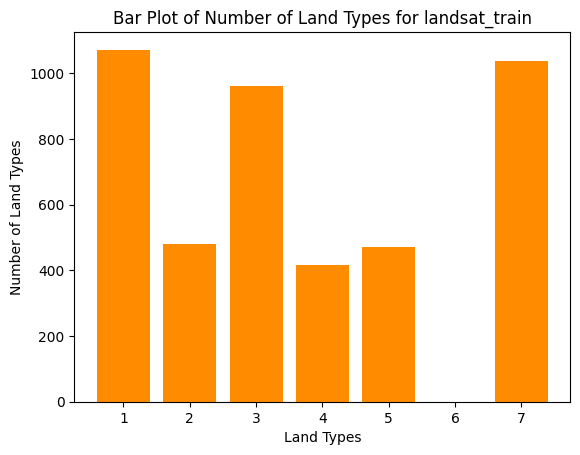

In [ ]:
# creating a bar plot to display number of land types for landsat_train
plt.bar(landsat_train['land_type'].value_counts().index, landsat_train['land_type'].value_counts(), color='darkorange')
plt.title('Bar Plot of Number of Land Types for landsat_train')
plt.xlabel('Land Types')
plt.ylabel('Number of Land Types')
plt.show()

In [ ]:
# extracting the value counts for landsat_test for land type
landsat_test['land_type'].value_counts()

,count
land_type,
7,470
1,461
3,397
5,237
2,224
4,211


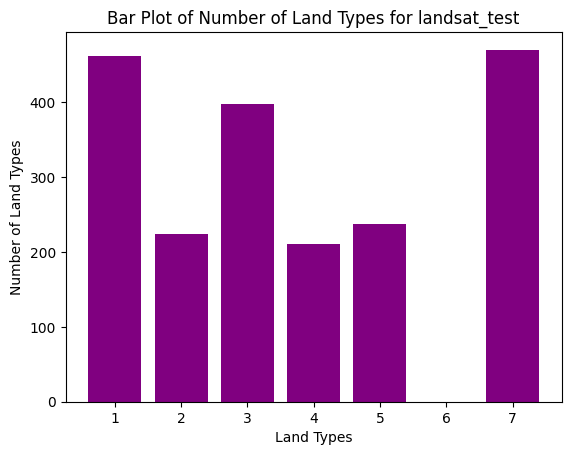

In [ ]:
# creating a bar plot to display number of land types for landsat_test
plt.bar(landsat_test['land_type'].value_counts().index, landsat_test['land_type'].value_counts(), color='purple')
plt.title('Bar Plot of Number of Land Types for landsat_test')
plt.xlabel('Land Types')
plt.ylabel('Number of Land Types')
plt.show()

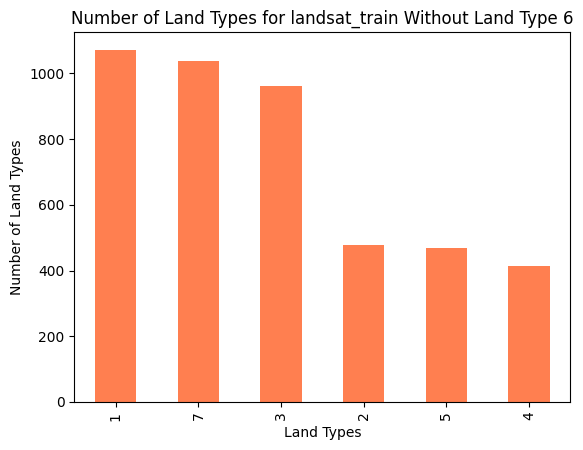

In [ ]:
# creating a bar graph with land type 6 for landset_train in descending order
landsat_train['land_type'].value_counts().plot(kind='bar', color='coral')
plt.title('Number of Land Types for landsat_train Without Land Type 6')
plt.xlabel('Land Types')
plt.ylabel('Number of Land Types')
plt.show()

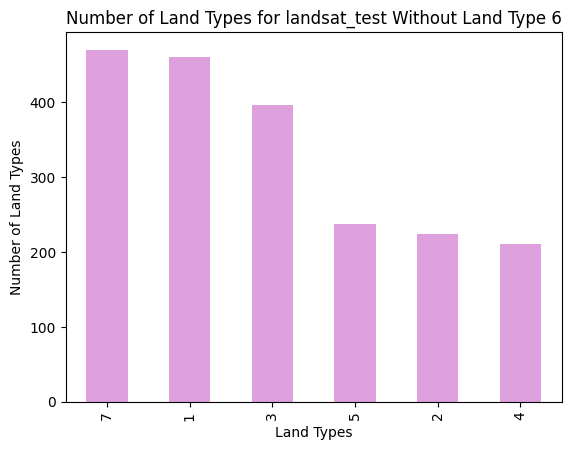

In [ ]:
# creating a bar graph with land type 6 for landset_test in descending order
landsat_test['land_type'].value_counts().plot(kind='bar', color='plum')
plt.title('Number of Land Types for landsat_test Without Land Type 6')
plt.xlabel('Land Types')
plt.ylabel('Number of Land Types')
plt.show()

## 4) Splitting Data into Train/Test
The data is already split into train/test, but you will have to manually split it further.

In [ ]:
# seperating the data into feature and target for train
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']

# seperating the data into feature and target for test
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

In [ ]:
# checking shape of x_train and x_test
print(X_train.shape)
print(X_test.shape)

(4435, 36)
(2000, 36)


## 5) Building the Pipeline
Create a column transformer that will MinMax scale the numerical variables and
create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.

In [ ]:
# conducting min max scaling for training and test data outside of pipeline since all features for both X_train adn X_test are numerical
# In this case, we will not need to create a column transformer
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# creating pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

## 6) Executing the Model
Run the pipeline to fit the RandomForestClassification model.

In [ ]:
# running the pipeline to fit model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

## 7) Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
# creating y_pred
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

Use the classification_function to display the precision, recall, and F1 score for each class.

In [ ]:
# displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

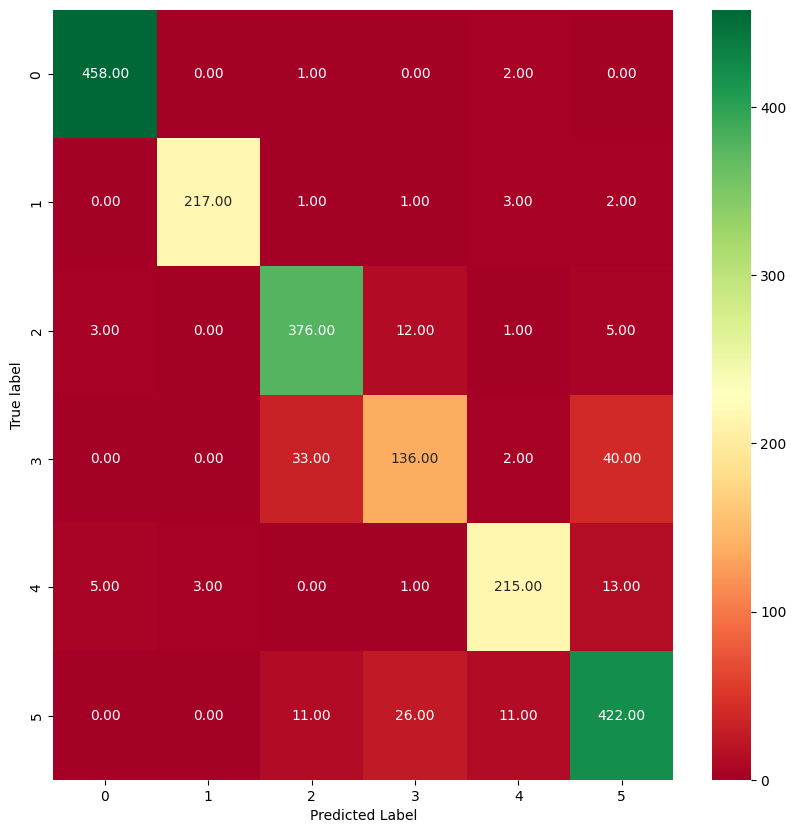

In [ ]:
# plotting confusion matrix
plot_cm(y_test, y_pred)

## 8) Conclusion
In a Markdown comment, write a conclusion on how suitable you think this model is for predicting land type.

Based on our accuracy score of 0.912 implies that our model did reasonably well given that is was 91.2% accurate.

Based on the classification report, the precision score was very high for land types 1 and land type 2 with precision scores of 0.98 and 0.99 respectively. The precision score was high for land type 5 with a score of 0.92. For and types 3 and 7 the precision score was somewhat high however for land type 4 the precision score was okay with a value of 0.77. These precision scores indicate that for land type 4 the model did not have as strong of a predictive performance wheras it had a predictive performance for 1, 2, 3, and 4.

Overall, the recall scores were quite high for a majority of the land types which indicate the model was able to capture a majority of the instances for the different land types with the exception of land type 4 which had a comparatively lower recall score which indicates the model failed to capture some instances for that land type.

Lastly, the F1-scores were also high for a majority of the land types which shows good performance overall for precision and recall. Again, land type 4 had the lowest F1-Score.

Based on our results we can conclude that our model is somewhat suitable for predicting land type though the model could be improved to help increase accuracy.

# Problem 2
Using the same data set, implement either a Voting Classifier, Bagging Classifier, or Boosting Classifier (only  one, your choice). I have not provided detailed steps for this problem - they will be the same as the previous problem.


## 1) AdaBoost Classifer (Boosting Classifer) - Acquire Data
Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.

In [ ]:
# loading the data for train
landsat_train = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/landsat_train.csv')
# loading the data for test
landsat_test = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/landsat_test.csv')

## 2) Statistical and Visual Exploration
Since we are using the same dataset from problem #1, we will be skipping this step.

## 3) Splitting Data into Train/Test
The data is already split into train/test, but you will have to manually split it further.

In [ ]:
X_train_boost = landsat_train.drop('land_type', axis=1)
y_train_boost = landsat_train['land_type']

X_test_boost = landsat_test.drop('land_type', axis=1)
y_test_boost = landsat_test['land_type']

## 4) Building the Pipeline
Create a column transformer that will MinMax scale the numerical variables and
create a pipeline that will transform the data and then run the AdaBoost Classifier algorithm.

In [ ]:
# conducting min max scaling for training and test data outside of pipeline since all features for both X_train_boost and X_test_boost are numerical
# In this case, we will not need to create a column transformer
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train_boost)
X_test2 = scaler.transform(X_test_boost)

In [ ]:
# creating the pipeline
adaboost_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME'))
])

## 5) Executing the Model
Run the pipeline to fit the AdaBoost Classification model.

In [ ]:
# running the pipeline to fit the model
adaboost_pipeline.fit(X_train_boost, y_train_boost)

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=100,
                                    random_state=42))])

## 6) Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
# creating y_pred_boost
y_pred_boost = adaboost_pipeline.predict(X_test_boost)
accuracy_score(y_test_boost, y_pred_boost)

0.762

Use the classification_function to display the precision, recall, and F1 score for each class.

In [ ]:
# printing classification report
print(classification_report(y_test_boost, y_pred_boost))

              precision    recall  f1-score   support

           1       0.91      0.88      0.89       461
           2       0.98      0.92      0.95       224
           3       0.88      0.93      0.90       397
           4       0.41      0.34      0.37       211
           5       0.54      0.74      0.63       237
           7       0.70      0.64      0.66       470

    accuracy                           0.76      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.76      0.76      0.76      2000



Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

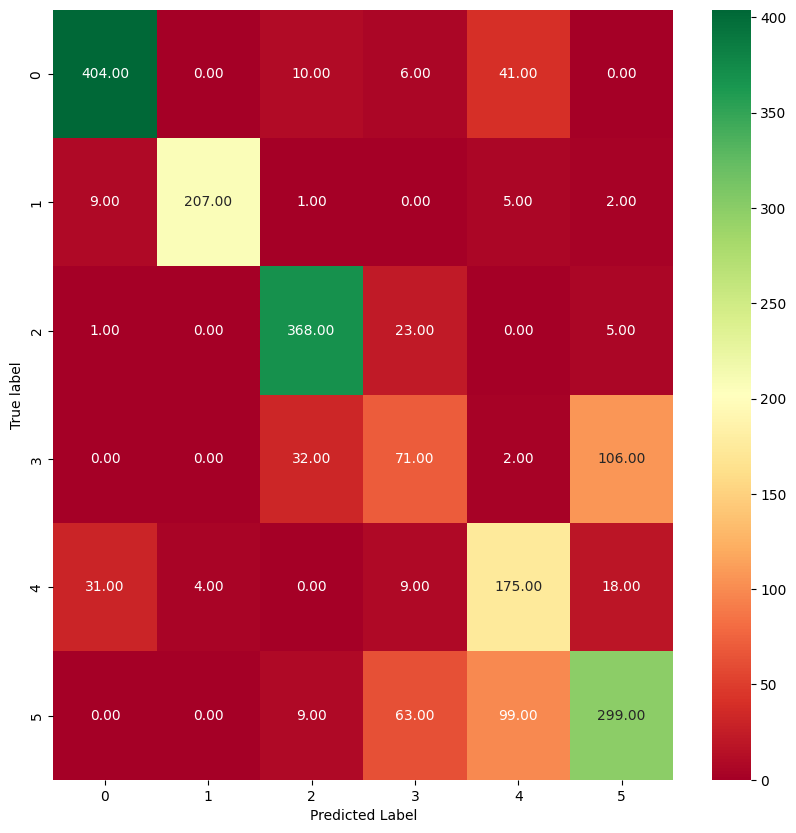

In [ ]:
# plotting the confusion matrix
plot_cm(y_test_boost, y_pred_boost)

## 7) Conclusion
In a Markdown comment, write a conclusion on how suitable you think this model is for predicting land type.

Based on our accuracy score of 0.762 implies that our model did not perform the best given that is was only 76.2% accurate though it did not perform terribly.

Based on the classification report, the precision score was very high for land type 2 with precision scores of 0.98. The precision score was high for land type 1 with a score of 0.91. The precison score was okay for land type 3 and somewhat okay for land type 7 however, the precision scores were somehwat bad for land types 4 and 5 with precision scores of 0.41 and 0.54 respectively. This implies that overall the predictive performance was high of the model was high for land types 2 and 1 but were moderate to low to the rest of the rest of the land types.

The recall scores were high for only land types 2 and 3 and moderate for land types 1 and 5. However, the recall score was low for land type 7 and signifcantly low for land type 4 with a score of 0.34. These scores indicate that the model overall was not ablt to capture a majority of the instances for some of the land types which is not a good sign towards the accuracy of the model.

Lastly, the F1-scores were high for land types 2 and 3 and moderate for land type 1 but low for land types 5, 6, and 7. This indicates that the performance was not the best overall in terms fo both recall and precision.

Based on our results we can conclude that this model is not suitable for predicting land type. Thus, we may need to utilze another model for this data.

# Problem 3
Using the banknote_authentication data set, implement a RandomForest classifier in the same manner as Problem 1. Ensure you include the classification_report and ConfusionMatrixDisplay functions.

## 1) Random Forest Classifier - Acquire Data
Load the banknote_authentication data set.

In [ ]:
# loading the data
df = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/banknote_authentication.csv')

## 2) Statistical and Visual Exploration
Since we are using the same dataset from a previous module where we looked into visuals, we will be skipping this step.

## 3) Splitting Data into Train/Test
Create a data frame called X of your inputs that includes all columns except date and forgery.

In [ ]:
X_class = df.drop('forgery', axis=1)
X_class.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.

In [ ]:
y_class = df['forgery']
y_class.sample(5)

,forgery
221,0
583,0
1211,1
830,1
225,0


Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [ ]:
# splitting the data into the train and test set
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

## 4) Building the Pipeline
Create a column transformer that will MinMax scale the numerical variables

In [ ]:
# creating the numerical features
numerical_features = ['variance', 'skewness', 'curtosis', 'entropy']

# transforming the numerical columns using MinMax scaler and combining preprocessing steps into column tranformer
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), numerical_features)])

Create a pipeline that will transform the data and then run the Random Forest Classification algorithm.

In [ ]:
# creating pipeline
randomforest_pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

## 5) Executing the Model
Run the pipeline to fit the Random Forest Classification model.

In [ ]:
# running the pipeline and fitting the model
randomforest_pipeline.fit(X_train_class, y_train_class)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## 6) Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
# creating y_pred_class
y_pred_class = randomforest_pipeline.predict(X_test_class)
accuracy_score(y_test_class, y_pred_class)

0.9927272727272727

Use the classification_function to display the precision, recall, and F1 score for each class.

In [ ]:
# printing classification report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

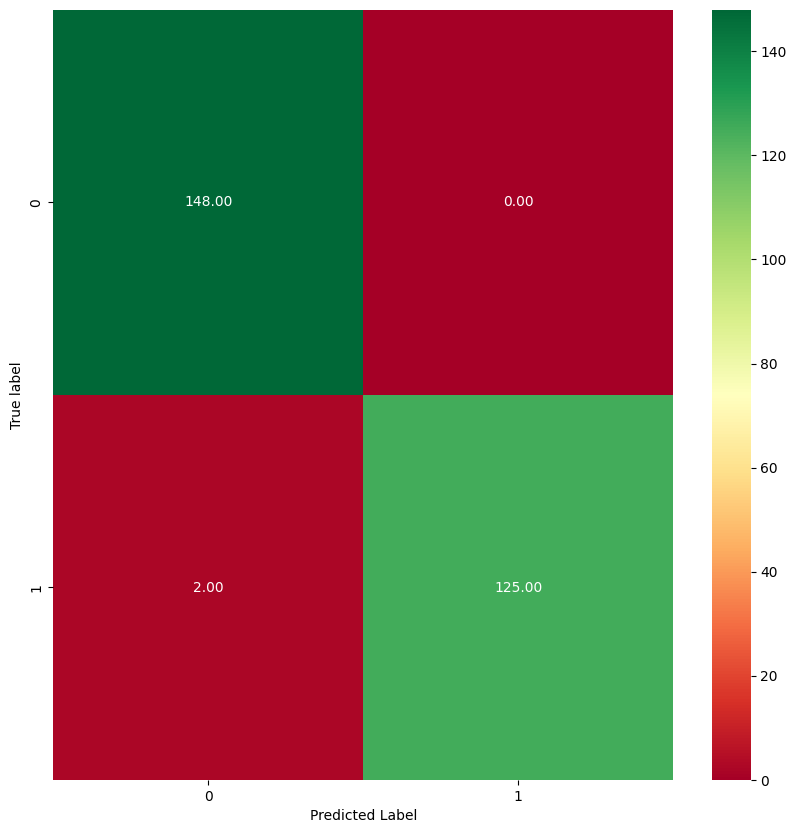

In [ ]:
# plotting confusion matrix
plot_cm(y_test_class, y_pred_class)

## 7) Conclusion
In a Markdown comment, write a conclusion on how suitable you think this model is for predicting whether or not a banknote is forgery.

We had a very high accuracy score of anout 0.99 meaning the model was 99% accurate. This can be justified by the classification report which showed that the precision score was very high with a value of 0.99 for non-forgeries and a perfect score of 1 for forgeries. This meant that overall the model had a strong predictive performance. Additionally, the recall scores overall were very high with a perfect score of 1 for non-forgies, meaning the model was able to capture all instances of non-forgeries. For forgeries the score was high with a value of 0.98 so a majority of the instances were captured for forgeries. Lastly, the high F1-scores aid the conclusion of high accuracy. The confusion matrix indicates that there were only two forgeries which were incorrectly predicted as non-forgeries. However, overall the model performed extremely well. Thus, we can conclude that this model is very suitable for predicting whether or not a banknote is a forgery.